In [6]:
# A1: Confusion matrix and performance metrics for classification problem
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have a classification model named 'classifier' and X_train, y_train, X_test, y_test

data, meta = arff.loadarff("3sources_bbc1000.arff")
dataset = np.array(data.tolist(), dtype=float)
classifier = KNeighborsClassifier(n_neighbors=3)

# Replace 'classifier' with your actual model
X = dataset[:, :-1]
y = dataset[:, -1]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Fit the model
classifier.fit(X_train, y_train)

# Predictions on training set
y_train_pred = classifier.predict(X_train)

# Predictions on test set
y_test_pred = classifier.predict(X_test)

# Confusion matrix
confusion_mat_train = confusion_matrix(y_train, y_train_pred)
confusion_mat_test = confusion_matrix(y_test, y_test_pred)

# Performance metrics
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Confusion Matrix (Training):")
print(confusion_mat_train)
print("Precision (Training):", precision_train)
print("Recall (Training):", recall_train)
print("F1-Score (Training):", f1_train)

print("\nConfusion Matrix (Test):")
print(confusion_mat_test)
print("Precision (Test):", precision_test)
print("Recall (Test):", recall_test)
print("F1-Score (Test):", f1_test)

# Inference about the model's learning outcome: Observe if precision, recall, and F1-Score are consistent between training and test sets.
# If training metrics are significantly better than test metrics, it might be overfitting. If both are low, it might be underfitting.



Confusion Matrix (Training):
[[234   0]
 [ 16  31]]
Precision (Training): 1.0
Recall (Training): 0.6595744680851063
F1-Score (Training): 0.7948717948717948

Confusion Matrix (Test):
[[60  0]
 [ 5  6]]
Precision (Test): 1.0
Recall (Test): 0.5454545454545454
F1-Score (Test): 0.7058823529411764


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
df = pd.read_excel('Lab Session1 Data.xlsx', sheet_name='Purchase data')

# Create a binary classification target variable
df['Category'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

# Encode the categorical target variable
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Extracting features and target variable
X = df.iloc[:, 1:4]  # Features: Candies, Mangoes, Milk Packets
y = df['Category']  # Numerical Target: 1 for RICH, 0 for POOR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Creating and training the K-NN classifier model
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_std, y_train)

# Predictions on training set
y_train_pred = knn_classifier.predict(X_train_std)

# Predictions on test set
y_test_pred = knn_classifier.predict(X_test_std)

# Classification metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Classification Metrics (Training):")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R2 Score:", r2_train)

print("\nClassification Metrics (Test):")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R2 Score:", r2_test)


Classification Metrics (Training):
MSE: 0.125
RMSE: 0.3535533905932738
MAE: 0.125
R2 Score: 0.4666666666666667

Classification Metrics (Test):
MSE: 0.5
RMSE: 0.7071067811865476
MAE: 0.5
R2 Score: -1.0


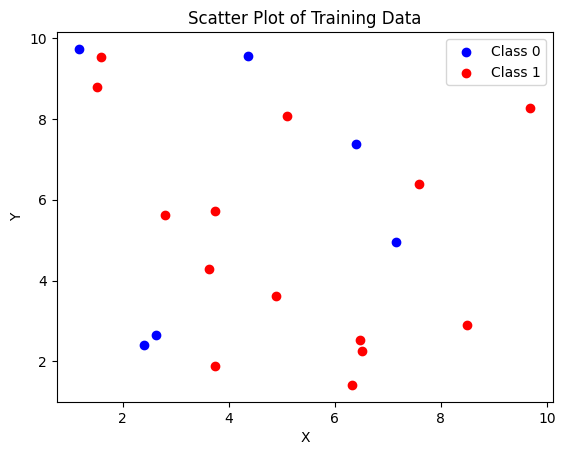

In [19]:
# A3: Generate 20 data points with 2 features and plot the scatter plot

import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(42)
X_train_a3 = np.random.uniform(1, 10, (20, 2))
y_train_a3 = np.random.choice([0, 1], 20)

# Separate data points for class 0 and class 1
class_0_points = X_train_a3[y_train_a3 == 0]
class_1_points = X_train_a3[y_train_a3 == 1]

# Scatter plot
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], color='blue', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], color='red', label='Class 1')

plt.title("Scatter Plot of Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()



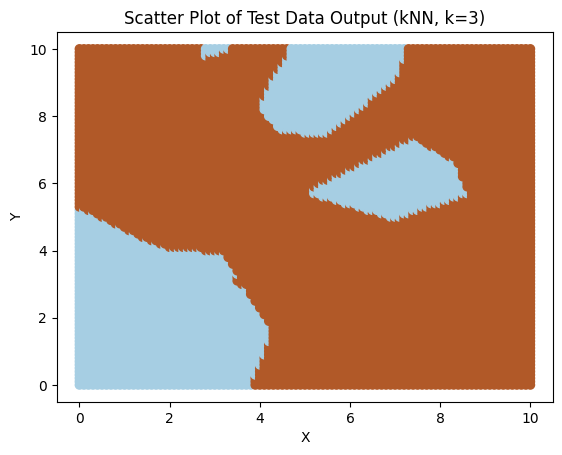

In [21]:
# A4: Generate test set data and classify using kNN classifier

from sklearn.neighbors import KNeighborsClassifier

# Generate test set data
x_test_values = np.arange(0, 10.1, 0.1)
y_test_values = np.arange(0, 10.1, 0.1)

X_test_a4 = np.array(np.meshgrid(x_test_values, y_test_values)).T.reshape(-1, 2)

# Classify using kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_a3, y_train_a3)
y_test_pred_a4 = knn_classifier.predict(X_test_a4)

# Scatter plot of test data output
plt.scatter(X_test_a4[:, 0], X_test_a4[:, 1], c=y_test_pred_a4, cmap=plt.cm.Paired)

plt.title("Scatter Plot of Test Data Output (kNN, k=3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Observe the color spread and class boundary lines in the feature space.



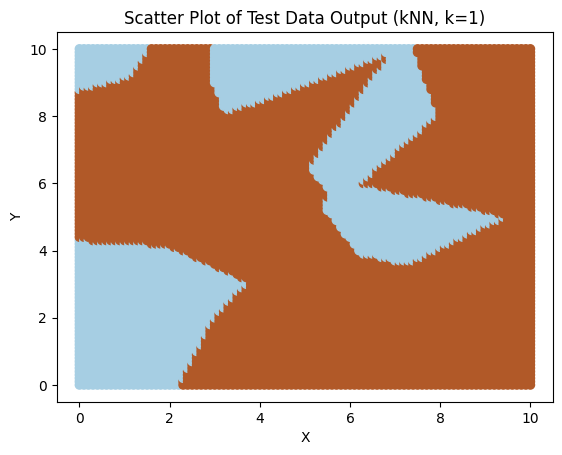

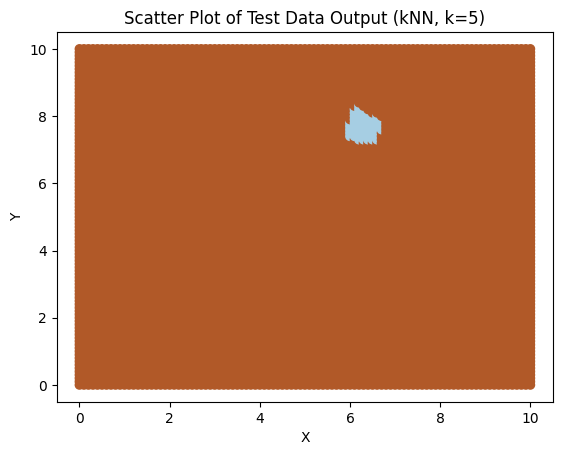

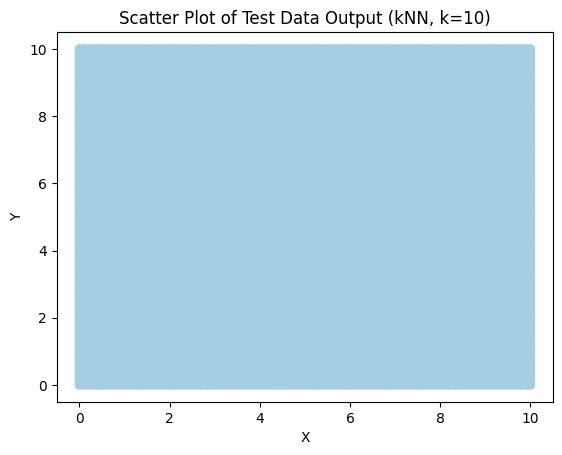

In [22]:
# A5: Repeat A4 for various values of k and observe the change in class boundary lines

k_values = [1, 5, 10]

for k in k_values:
    knn_classifier_a5 = KNeighborsClassifier(n_neighbors=k)
    knn_classifier_a5.fit(X_train_a3, y_train_a3)
    y_test_pred_a5 = knn_classifier_a5.predict(X_test_a4)

    plt.scatter(X_test_a4[:, 0], X_test_a4[:, 1], c=y_test_pred_a5, cmap=plt.cm.Paired)
    plt.title(f"Scatter Plot of Test Data Output (kNN, k={k})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Observe the change in class boundary lines for different values of k.

